In [ ]:
# Import necessary libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


#to display all rows columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)


In [ ]:
df = pd.read_csv('ODI_data.csv')   # data year start - end

In [ ]:
df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N Pooran,42,42,69,1.0,0.0,52,4,1,80.76,2,v India,Port of Spain,11-08-2019,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df), len(df.columns)

(171968, 28)

In [ ]:
# Runs per innings
# SR
# 100's
# 50's
# Team contribution

In [ ]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '-', nan, '40', '6', '4', '87', '54', '46',
       '30', '12', '69', '39', '14', '10', '9', '8', '7', '82', '52',
       '41', '15', '98', '43', '19', '111', '48', '36', '25', '67', '60',
       '84', '59', '55', '47', '85', '49', '45', '34', '29', '22', '74',
       '28', '77', '50', '32', '23', '35', '122', '100', '95', '103',
       '113', '53', '96', '27', '64', '58', '33', '31', '73', '56', '86',
       '62', '106', '24', '57', '104', '26', '66', '51', '118', '105',
       '101', '21', '79', '44', '102', '88', '80', '72', '97', '68', '89',
       '38', '83', '63', '148', '166', '90', '76', '37', '70', '124',
       '94', '140', '153', '107', '117', '121', '92', '78', '75', '114',
       '115', '130', '128', '151', '110', '138', '135', '109', '61',
       '179', '170', '112', '116', '91', '143', '93', '123', '145', '81',
       '150', '162', '108', '131', '133', '137', '146', '139', 

In [ ]:
df = df[df['Innings Runs Scored Num'] != '-']

In [ ]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', nan, '40', '6', '4', '87', '54', '46', '30',
       '12', '69', '39', '14', '10', '9', '8', '7', '82', '52', '41',
       '15', '98', '43', '19', '111', '48', '36', '25', '67', '60', '84',
       '59', '55', '47', '85', '49', '45', '34', '29', '22', '74', '28',
       '77', '50', '32', '23', '35', '122', '100', '95', '103', '113',
       '53', '96', '27', '64', '58', '33', '31', '73', '56', '86', '62',
       '106', '24', '57', '104', '26', '66', '51', '118', '105', '101',
       '21', '79', '44', '102', '88', '80', '72', '97', '68', '89', '38',
       '83', '63', '148', '166', '90', '76', '37', '70', '124', '94',
       '140', '153', '107', '117', '121', '92', '78', '75', '114', '115',
       '130', '128', '151', '110', '138', '135', '109', '61', '179',
       '170', '112', '116', '91', '143', '93', '123', '145', '81', '150',
       '162', '108', '131', '133', '137', '146', '139', '125'

In [ ]:
df = df.dropna(subset = ['Innings Runs Scored Num'])

In [ ]:
df['Innings Runs Scored Num'].unique()

array(['65', '42', '18', '17', '13', '11', '5', '0', '120', '71', '20',
       '16', '3', '2', '1', '40', '6', '4', '87', '54', '46', '30', '12',
       '69', '39', '14', '10', '9', '8', '7', '82', '52', '41', '15',
       '98', '43', '19', '111', '48', '36', '25', '67', '60', '84', '59',
       '55', '47', '85', '49', '45', '34', '29', '22', '74', '28', '77',
       '50', '32', '23', '35', '122', '100', '95', '103', '113', '53',
       '96', '27', '64', '58', '33', '31', '73', '56', '86', '62', '106',
       '24', '57', '104', '26', '66', '51', '118', '105', '101', '21',
       '79', '44', '102', '88', '80', '72', '97', '68', '89', '38', '83',
       '63', '148', '166', '90', '76', '37', '70', '124', '94', '140',
       '153', '107', '117', '121', '92', '78', '75', '114', '115', '130',
       '128', '151', '110', '138', '135', '109', '61', '179', '170',
       '112', '116', '91', '143', '93', '123', '145', '81', '150', '162',
       '108', '131', '133', '137', '146', '139', '125', '12

In [ ]:
df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate
0,E Lewis,65,65,128,1.0,0.0,80,8,1,81.25,2,v India,Port of Spain,11-08-2019,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# convert to datetime
df['Innings Date'] = pd.to_datetime(df['Innings Date'])

In [ ]:
df['year'] = df['Innings Date'].dt.year

In [ ]:
df.tail(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
171941,RW Marsh,10*,10,24,1.0,1.0,18,2,0,55.55,2,v England,Melbourne,1971-05-01,Australia,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971


In [ ]:
df['Innings Runs Scored Num'] = df['Innings Runs Scored Num'].astype('int')

In [ ]:
df['Innings Balls Faced'] = df['Innings Balls Faced'].astype('int')

In [ ]:
df['Innings Not Out Flag'] = df['Innings Not Out Flag'].astype('int')

In [ ]:
# Sachin 1994 - 2004
# Virat 2009 - 2019

In [ ]:
sachin_df = df[(df.year >= 1994) & (df.year <= 2004)]

In [ ]:
kohli_df = df[(df.year >= 2009) & (df.year <= 2019)]

In [ ]:
sachin_df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77610,V Sehwag,70,70,85,1.0,0,52,9,2,134.61,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77611,Yuvraj Singh,69,69,34,1.0,0,32,8,3,215.62,1,v Bangladesh,Dhaka,2004-12-27,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [ ]:
kohli_df.head(2)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,N Pooran,42,42,69,1.0,0,52,4,1,80.76,2,v India,Port of Spain,2019-11-08,West Indies,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [ ]:
# Runs per innings = Total Runs/Total Innings
# SR = 100*(Total Runs/Total Balls)
# 100's = sum(100's)
# 50's = sum(50's)
# Team contribution = Player Runs/Team Runs (ex: Virat 50/ Team Ind 150 => 50/150 : 33%)

In [ ]:
# df.dtypes

In [ ]:
# sachin_df.to_csv('sachin_data.csv')

In [ ]:
# what is the total runs scored by sachin in these time frames?

In [ ]:
# sachin_df.head(20)

In [ ]:
# SR Tendulkar
sdf = sachin_df[sachin_df['Innings Player'] == 'SR Tendulkar']

In [ ]:
sdf.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
77747,SR Tendulkar,19,19,46,1.0,0,32,3,0,59.37,1,v Bangladesh,Chattogram,2004-12-23,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
78054,SR Tendulkar,16,16,30,1.0,0,17,2,0,94.11,1,v Pakistan,Kolkata,2004-11-13,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
79590,SR Tendulkar,74,74,170,1.0,0,100,7,1,74,2,v Sri Lanka,Colombo (RPS),2004-01-08,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004
79681,SR Tendulkar,18,18,30,1.0,0,21,3,0,85.71,1,v Sri Lanka,Colombo (RPS),2004-07-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


In [ ]:
sum(sdf['Innings Runs Scored Num'])

11818

In [ ]:
kdf = kohli_df[kohli_df['Innings Player'] == 'V Kohli']

In [ ]:
# kohli_df['Innings Player'].unique()

In [ ]:
kdf.head()

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
11,V Kohli,120,120,179,1.0,0,125,14,1,96,1,v West Indies,Port of Spain,2019-11-08,India,0.0,1.0,100-149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
327,V Kohli,1,1,8,1.0,0,6,0,0,16.66,2,v New Zealand,Manchester,2019-09-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
420,V Kohli,34*,34,61,1.0,1,41,3,0,82.92,2,v Sri Lanka,Leeds,2019-06-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
664,V Kohli,26,26,45,1.0,0,27,3,0,96.29,1,v Bangladesh,Birmingham,2019-02-07,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
804,V Kohli,66,66,103,1.0,0,76,7,0,86.84,2,v England,Birmingham,2019-06-30,India,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [ ]:
sum(kdf['Innings Runs Scored Num'])

11247

In [ ]:
len(kdf), len(sdf)

(224, 271)

In [ ]:
# RPI - Sachin, Virat
sum(kdf['Innings Runs Scored Num'])/len(kdf), sum(sdf['Innings Runs Scored Num'])/len(sdf)

(50.20982142857143, 43.608856088560884)

In [ ]:
# SR
100*sum(kdf['Innings Runs Scored Num'])/sum(kdf['Innings Balls Faced']), 100*sum(sdf['Innings Runs Scored Num'])/sum(sdf['Innings Balls Faced'])

(93.56126778138258, 88.21377920429947)

In [ ]:
# 100's
sum(kdf["100's"]), sum(sdf["100's"])

(42.0, 37.0)

In [ ]:
# 50's
sum(kdf["50's"]), sum(sdf["50's"])

(53.0, 57.0)

In [ ]:
# Team Contribution - Runs score by each player, Runs by team
sum(kdf['Innings Runs Scored Num']), sum(sdf['Innings Runs Scored Num'])

(11247, 11818)

In [ ]:
# 1994 - 2004 = All players
sum(sachin_df[sachin_df.Country == 'India']['Innings Runs Scored Num'])

69715

In [ ]:
# 2009 - 2019 = All players
sum(kohli_df[kohli_df.Country == 'India']['Innings Runs Scored Num'])

63867

In [ ]:
100*sum(kdf['Innings Runs Scored Num'])/sum(kohli_df[kohli_df.Country == 'India']['Innings Runs Scored Num'])

17.610033350556627

In [ ]:
100*sum(sdf['Innings Runs Scored Num'])/sum(sachin_df[sachin_df.Country == 'India']['Innings Runs Scored Num'])

16.951875493078965

### Visualizations:

In [ ]:
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(10)

Innings Player
SR Tendulkar      11818
SC Ganguly        9911 
ST Jayasuriya     9297 
Inzamam-ul-Haq    8561 
R Dravid          7751 
RT Ponting        7422 
Saeed Anwar       7320 
JH Kallis         7267 
MS Atapattu       7253 
MG Bevan          6912 
Name: Innings Runs Scored Num, dtype: int32

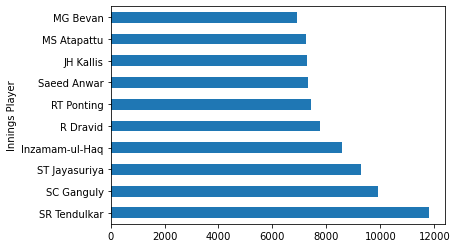

In [ ]:
sachin_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.show()

In [ ]:
kohli_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(10)

Innings Player
V Kohli           11247
RG Sharma         8083 
HM Amla           7745 
TM Dilshan        7296 
KC Sangakkara     7275 
AB de Villiers    7247 
LRPL Taylor       7059 
MS Dhoni          6838 
EJG Morgan        6748 
MJ Guptill        6626 
Name: Innings Runs Scored Num, dtype: int32

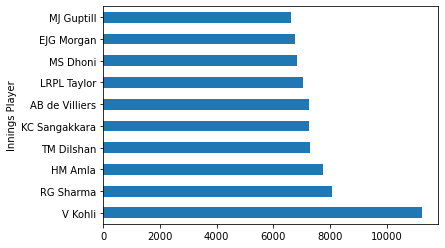

In [ ]:
kohli_df.groupby(['Innings Player'])['Innings Runs Scored Num'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.show()

In [ ]:
sdf.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
77614,SR Tendulkar,47,47,60,1.0,0,42,9,0,111.9,1,v Bangladesh,Dhaka,2004-12-27,India,0.0,0.0,0-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004


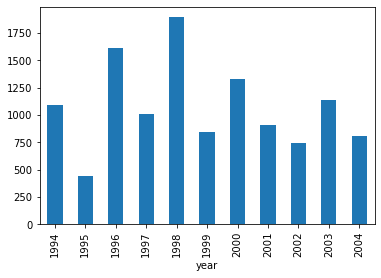

In [ ]:
sdf.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind = 'bar')

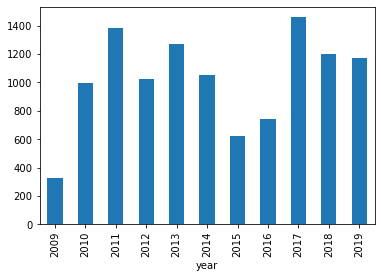

In [ ]:
kdf.groupby(['year'])['Innings Runs Scored Num'].sum().plot(kind = 'bar')

### Normalization:

In [ ]:
# RPI - Sachin, Virat
sum(kdf['Innings Runs Scored Num'])/len(kdf), sum(sdf['Innings Runs Scored Num'])/len(sdf)

(50.20982142857143, 43.608856088560884)

In [ ]:
# Kohli_df = player runs with Kohli
# player runs excluding Kohli => not_kohli = kohli_df[kohli_df.player_name != 'V Kohli']

In [ ]:
# RPI - Sachin, Virat
sum(kohli_df['Innings Runs Scored Num'])/len(kohli_df)

24.99673202614379

In [ ]:
kohli_df.head(1)

,Innings Player,Innings Runs Scored,Innings Runs Scored Num,Innings Minutes Batted,Innings Batted Flag,Innings Not Out Flag,Innings Balls Faced,Innings Boundary Fours,Innings Boundary Sixes,Innings Batting Strike Rate,Innings Number,Opposition,Ground,Innings Date,Country,50's,100's,Innings Runs Scored Buckets,Innings Overs Bowled,Innings Bowled Flag,Innings Maidens Bowled,Innings Runs Conceded,Innings Wickets Taken,4 Wickets,5 Wickets,10 Wickets,Innings Wickets Taken Buckets,Innings Economy Rate,year
0,E Lewis,65,65,128,1.0,0,80,8,1,81.25,2,v India,Port of Spain,2019-11-08,West Indies,1.0,0.0,50-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [ ]:
non_kohli_df = kohli_df[kohli_df['Innings Player'] != 'V Kohli']

In [ ]:
non_sachin_df = sachin_df[sachin_df['Innings Player'] != 'SR Tendulkar']

In [ ]:
# Avg = 25 runs
# Kohli = 50

In [ ]:
(sum(kdf['Innings Runs Scored Num'])/len(kdf))/(sum(non_kohli_df['Innings Runs Scored Num'])/len(non_kohli_df))

2.029683688052565

In [ ]:
(sum(sdf['Innings Runs Scored Num'])/len(sdf))/(sum(non_sachin_df['Innings Runs Scored Num'])/len(non_sachin_df))

1.9437755485945407

In [ ]:
# kohli => other
# SR = V = 93, Other = 80, V/other, S/others
# 100s - Number of matches to score a 100
# 50s - Number of matches to score a 50
# Team contribution - V_cont/O_cont

In [ ]:
200/40, 200/37

(5.0, 5.405405405405405)

### Strike Rate:

In [ ]:
# sr of sachin
sum(sdf['Innings Runs Scored Num'])/sum(sdf['Innings Balls Faced'])

0.8821377920429947

In [ ]:
# sr of sachin's peers
sum(non_sachin_df['Innings Runs Scored Num'])/sum(non_sachin_df['Innings Balls Faced'])

0.7233808936558636

In [ ]:
# sr of kohli
sum(kdf['Innings Runs Scored Num'])/sum(kdf['Innings Balls Faced'])

0.9356126778138258

In [ ]:
# sr of kohli's peers
sum(non_kohli_df['Innings Runs Scored Num'])/sum(non_kohli_df['Innings Balls Faced'])

0.8342743413330611

In [ ]:
# normalized sachin's value
sachin_sr = sum(sdf['Innings Runs Scored Num'])/sum(sdf['Innings Balls Faced'])
sachin_peer_sr = sum(non_sachin_df['Innings Runs Scored Num'])/sum(non_sachin_df['Innings Balls Faced'])
sachin_sr/sachin_peer_sr

1.2194651528391862

In [ ]:
# normalized kohli's value
kohli_sr = sum(kdf['Innings Runs Scored Num'])/sum(kdf['Innings Balls Faced'])
kohli_peer_sr = sum(non_kohli_df['Innings Runs Scored Num'])/sum(non_kohli_df['Innings Balls Faced'])
kohli_sr/kohli_peer_sr

1.121468839996732

### 100's: Number of matches to score a 100

In [ ]:
# sachin matches per 100
len(sdf)/sum(sdf["100's"])

7.324324324324325

In [ ]:
# sachin peers - matches per 100
len(non_sachin_df)/sum(non_sachin_df["100's"])

47.377969762419006

In [ ]:
# kohli matches per 100
len(kdf)/sum(kdf["100's"])

5.333333333333333

In [ ]:
# kohli peers - matches per 100
len(non_kohli_df)/sum(non_kohli_df["100's"])

29.311827956989248

In [ ]:
# normalized sachin value
sachin_mper_100 = len(sdf)/sum(sdf["100's"])
sachin_peers_mper_100 = len(non_sachin_df)/sum(non_sachin_df["100's"])
sachin_mper_100/sachin_peers_mper_100

0.15459346107595562

In [ ]:
# normalized virat value
kohli_mper_100 = len(kdf)/sum(kdf["100's"])
kohli_peers_mper_100 = len(non_kohli_df)/sum(non_kohli_df["100's"])
kohli_mper_100/kohli_peers_mper_100

0.18195157740278795

### 50's: Number of matches to score a 50

In [ ]:
# sachin matches per 100
len(sdf)/sum(sdf["50's"])

4.754385964912281

In [ ]:
# sachin peers - matches per 100
len(non_sachin_df)/sum(non_sachin_df["50's"])

8.33751425313569

In [ ]:
# kohli matches per 100
len(kdf)/sum(kdf["50's"])

4.226415094339623

In [ ]:
# kohli peers - matches per 100
len(non_kohli_df)/sum(non_kohli_df["50's"])

7.673469387755102

In [ ]:
# normalized sachin value
sachin_mper_50 = len(sdf)/sum(sdf["50's"])
sachin_peers_mper_50 = len(non_sachin_df)/sum(non_sachin_df["50's"])
sachin_mper_50/sachin_peers_mper_50

0.5702402203539483

In [ ]:
# normalized virat value
kohli_mper_50 = len(kdf)/sum(kdf["50's"])
kohli_peers_mper_50 = len(non_kohli_df)/sum(non_kohli_df["50's"])
kohli_mper_50/kohli_peers_mper_50

0.5507828181453231

### Team Contribution: Here we are already comparing with peers, hence no need of a normalization

In [ ]:
# % of team runs by sachin
100*sum(sdf['Innings Runs Scored Num'])/(sum(non_sachin_df[non_sachin_df.Country == 'India']['Innings Runs Scored Num'])+sum(sdf['Innings Runs Scored Num']))

16.951875493078965

In [ ]:
# % of team runs by kohli
100*sum(kdf['Innings Runs Scored Num'])/(sum(non_kohli_df[non_kohli_df.Country == 'India']['Innings Runs Scored Num'])+sum(kdf['Innings Runs Scored Num']))

17.610033350556627

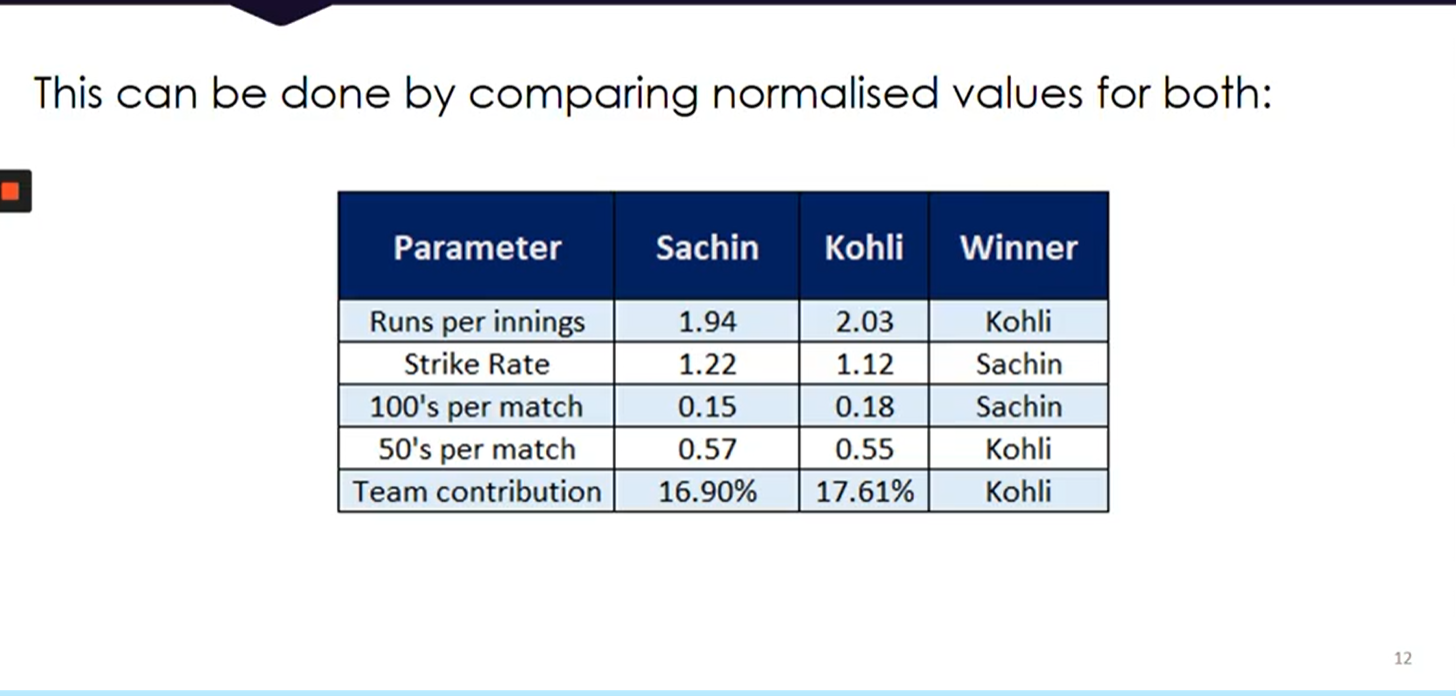